# Metody Obliczeniowe w Nauce i Technice
## Laboratorium 1: Arytmetyka komputerowa
## Przemysław Węglik

### Zadanie 1 - Sumowanie liczb pojedynczej precyzji

**1. Napisz program, który oblicza sumę N liczb pojedynczej precyzji przechowywanych
w tablicy o N = $10^7$
elementach. Tablica wypełniona jest tą samą wartością v z
przedziału [0.1, 0.9] np. v = 0.53125.**

In [6]:
import numpy as np

N = 10 ** 7
VALUE = 0.53125
EXPECTED_VALUE = N * VALUE

array = np.full(N, VALUE, dtype=np.float32)

array_sum = np.float32(0)

for i in range(len(array)):
    array_sum += array[i]
    
print(f'Calculated result: {array_sum}')
print(f'Expected result: {EXPECTED_VALUE}')


Calculated result: 5030840.5
Expected result: 5312500.0


**2. Wyznacz bezwzględny i względny błąd obliczeń. Dlaczego błąd względny jest tak
duży?**

In [7]:
absolute_error: float = abs(EXPECTED_VALUE - array_sum)
relative_error: float = absolute_error/EXPECTED_VALUE
    
print(f'Absolute error: {absolute_error}')
print(f'Relative error: {relative_error}')

Absolute error: 281659.5
Relative error: 0.05301825882352941


Podczas dodawania dużej i małej liczby mantysa jest dostosowywana do tej dużej co powoduje utratę znaczących bitów, a w ekstramalnym przypadku zniknięcie liczby.

**3. W jaki sposób rośnie błąd względny w trakcie sumowania? Przedstaw wykres (raportuj wartość błędu co 25000 kroków) i dokonaj jego interpretacji.**

Text(0, 0.5, 'relative_error')

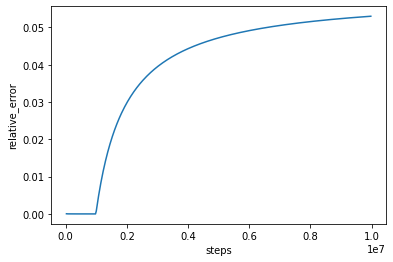

In [8]:
import matplotlib.pyplot as plt
from typing import List

array_sum = np.float32(0)

errors: List[float] = []
steps: List[int] = []

for i in range(len(array)):
    array_sum += array[i]
    
    if i % 25000 == 0 and i != 0:
        partial_expected_value: float = i * VALUE
        partial_relative_error: float = abs(partial_expected_value - array_sum)/partial_expected_value

        errors.append(partial_relative_error)
        steps.append(i)

plt.plot(steps, errors)
plt.xlabel("steps")
plt.ylabel("relative_error")

**4.  Zaimplementuj rekurencyjny algorytm sumowania.**

In [9]:
def recursive_sum(array) -> np.float32:
    if len(array) <= 2:
        return np.sum(array)
    
    return recursive_sum(array[0:len(array)//2]) + \
        recursive_sum(array[len(array)//2:])

array = np.full(N, VALUE, dtype=np.float32)

array_recursive_sum = np.float32(0)

array_recursive_sum = recursive_sum(array)
    
print(f'Calculated result: {array_recursive_sum}')
print(f'Expected result: {EXPECTED_VALUE}')

Calculated result: 5312500.0
Expected result: 5312500.0


**5. Wyznacz bezwzględny i względny błąd obliczeń. Dlaczego błąd względny znacznie
zmalał?**

In [10]:
absolute_error_recursive: float = abs(EXPECTED_VALUE - array_recursive_sum)
relative_error_recursive: float = absolute_error/EXPECTED_VALUE
    
print(f'Absolute error: {absolute_error_recursive}')
print(f'Relative error: {relative_error_recursive}')

Absolute error: 0.0
Relative error: 0.05301825882352941


**6. Porównaj czas działania obu algorytmów dla tych samych danych wejściowych.** 

In [11]:
print(f' Naive sum:')
print(f'Absolute error: {absolute_error}')
print(f'Relative error: {relative_error}')
print()
print(f'Recursive sum:')
print(f'Absolute error: {absolute_error_recursive}')
print(f'Relative error: {relative_error_recursive}')

 Naive sum:
Absolute error: 281659.5
Relative error: 0.05301825882352941

Recursive sum:
Absolute error: 0.0
Relative error: 0.05301825882352941


**7.  Przedstaw przykładowe dane wejściowe, dla których algorytm sumowania rekurencyjnego zwraca niezerowy błąd.**

In [12]:
N = 10 ** 3
VALUE = 0.53125
BIG_VALUE = 10 ** 4
EXPECTED_VALUE = N/2 * VALUE + N/2 * BIG_VALUE


array = np.full(N, VALUE, dtype=np.float32)

for i in range(len(array)):
    if i % 2 == 0:
        array[i] = BIG_VALUE

array_recursive_sum = np.float32(0)

array_recursive_sum = recursive_sum(array)
    
print(f'Calculated result: {array_recursive_sum}')
print(f'Expected result: {EXPECTED_VALUE}')

absolute_error_recursive: float = abs(EXPECTED_VALUE - array_recursive_sum)
relative_error_recursive: float = absolute_error_recursive/EXPECTED_VALUE

print(f'Absolute error: {absolute_error_recursive}')
print(f'Relative error: {relative_error_recursive}')

Calculated result: 5000266.0
Expected result: 5000265.625
Absolute error: 0.375
Relative error: 7.499601583665868e-08


### Zadanie 2 - Algorytm Kahana

Zaimplementuj algorytm sumowania Kahana.

In [13]:
def kahan_sum(array):
    array_sum = np.float32(0)
    err = np.float32(0)

    for i in range(len(array)):
        y = np.float32(array[i] - err)
        temp = np.float32(array_sum + y)
        err = (temp - array_sum) - y
        array_sum = temp
        
    return array_sum

N = 10 ** 7
VALUE = 0.1
EXPECTED_VALUE = N * VALUE

array = np.full(N, VALUE, dtype=np.float32)
array_sum = kahan_sum(array)

print(f'Calculated result: {array_sum}')
print(f'Expected result: {EXPECTED_VALUE}')

Calculated result: 1000000.0
Expected result: 1000000.0


1. Wyznacz bezwzględny i względny błąd obliczeń dla tych samych danych wejściowych jak w przypadku testów z Zadania 1.

In [14]:
absolute_error: float = abs(EXPECTED_VALUE - array_sum)
relative_error: float = absolute_error/EXPECTED_VALUE
    
print(f'Absolute error: {absolute_error}')
print(f'Relative error: {relative_error}')

Absolute error: 0.0
Relative error: 0.0


2.  Wyjaśnij dlaczego w algorytm Kahana ma znacznie lepsze własności numeryczne?
Do czego służy zmienna err?

W zmiennej $err$ przechowywane są bity utracone z $y$ podczas obliczania $temp$. Algorytm ma dużo lepszą dokładność, bo nie odrzucamy niskich bitów mantysy tylko wykorzystujemy je do korekcji w następnym kroku

3. Porównaj czasy działania algorytmu Kahana oraz algorytmu sumowania rekurencyjnego dla tych samych danych wejściowych.

In [15]:
import timeit
recursive_time = timeit.timeit(
    lambda: recursive_sum(array),
    number=1
)

kahan_time = timeit.timeit(
    lambda: kahan_sum(array),
    number=1
)

print(f'Running time of recursive algorithm: {recursive_time}')
print(f'Running time of Kahan algorithm: {kahan_time}')

Running time of recursive algorithm: 16.631422145999977
Running time of Kahan algorithm: 6.193081035000091


### Zadanie 3 - Sumy częściowe

In [16]:
def riemann_zeta_function_sum(s: float, n: int, to_bottom: bool = False, sum_type = np.float32):
    series_sum = sum_type(0)
    if to_bottom:
        for i in range(n, 0, -1): # [n, 1]
            series_sum += sum_type(1/(i**s))
    else:
        for i in range(1, n+1):
            series_sum += sum_type(1/(i**s))
        
    return series_sum
        
def dirichlet_eta_function_sum(s: float, n: int, to_bottom: bool = False, sum_type = np.float32):
    series_sum = sum_type(0)
    
    if to_bottom:
        for i in range(n, 0, -1): # [n, 1]
            series_sum += (-1)**(i-1) * 1/(i**s)
    else:
        for i in range(1, n+1):
            series_sum += (-1)**(i-1) * 1/(i**s)
 
    return series_sum

In [86]:
s_list = [2, 3.6667, 5, 7.2, 10]
n_list = [50, 100, 200, 500, 1000]

print(f'float32')
for n in n_list:
    for s in s_list:
        print(f'n: {n}, s: {s}')
        print('  Riemann:')
        print(f'   Bottom to up: {riemann_zeta_function_sum(s, n, to_bottom = False, sum_type = np.float32) :.20f}')
        print(f'   Up to bottom: {riemann_zeta_function_sum(s, n, to_bottom = True, sum_type = np.float32):.20f}')
        print('  Dirichlet:')
        print(f'   Bottom to up: {dirichlet_eta_function_sum(s, n, to_bottom = False, sum_type = np.float32):.20f}')
        print(f'   Up to bottom: {dirichlet_eta_function_sum(s, n, to_bottom = True, sum_type = np.float32):.20f}')

print(f'float64')
for n in n_list:
    for s in s_list:
        print(f'n: {n}, s: {s}')
        print('  Riemann:')
        print(f'   Bottom to up: {riemann_zeta_function_sum(s, n, to_bottom = False, sum_type = np.float64):.20f}')
        print(f'   Up to bottom: {riemann_zeta_function_sum(s, n, to_bottom = True, sum_type = np.float64):.20f}')
        print('  Dirichlet:')
        print(f'   Bottom to up: {dirichlet_eta_function_sum(s, n, to_bottom = False, sum_type = np.float64):.20f}')
        print(f'   Up to bottom: {dirichlet_eta_function_sum(s, n, to_bottom = True, sum_type = np.float64):.20f}')
       

float32
n: 50, s: 2
  Riemann:
   Bottom to up: 1.62513291835784912109
   Up to bottom: 1.62513267993927001953
  Dirichlet:
   Bottom to up: 0.82227103182602945264
   Up to bottom: 0.82227103182602889753
n: 50, s: 3.6667
  Riemann:
   Bottom to up: 1.10939943790435791016
   Up to bottom: 1.10939979553222656250
  Dirichlet:
   Bottom to up: 0.93469306003071062072
   Up to bottom: 0.93469306003071095379
n: 50, s: 5
  Riemann:
   Bottom to up: 1.03692746162414550781
   Up to bottom: 1.03692770004272460938
  Dirichlet:
   Bottom to up: 0.97211976892679785589
   Up to bottom: 0.97211976892679763385
n: 50, s: 7.2
  Riemann:
   Bottom to up: 1.00722765922546386719
   Up to bottom: 1.00722765922546386719
  Dirichlet:
   Bottom to up: 0.99352700066134858048
   Up to bottom: 0.99352700066134813639
n: 50, s: 10
  Riemann:
   Bottom to up: 1.00099456310272216797
   Up to bottom: 1.00099456310272216797
  Dirichlet:
   Bottom to up: 0.99903950759827175876
   Up to bottom: 0.99903950759827153671
n: 1

*Wnioski:*
W przypadku funkcji *Zeta Riemanna*, jeśli sumujemy zaczynając od $k=1$, na samym początku sumujemy wyrazy duże, a po jakimś czasie do dużej zakumulowanej sumy dodajmy dużo mniejsze wyrazy (te dla większych $k$), przez co tracimy na precyzji. Dla szeregu funkcji Riemanna, lepsze będzie zatem sumowanie zaczynając od mniejszych wyrazów (czyli z początkowym $k=n$). Warto zaznaczyć, że dla większych $s$ problem ten nie występuje. Większy wykładnik potęgi sprawia, że mianowniki ułamków są duże, a zatem same składniki w szeregu mniejsze, przez co nie następuję aż taka akumulacja.
Dla funkcji *Eta Dirichleta* problem nadmiernej różnicy rzędu wielkości między akumulatorem a kolejnymi składnikami występuje w dużo mniejszym stopniu. Wyjaśnić to można faktem, że kolejne składniki mają naprzemienne znaki, a zatem akumulowanie się wartości jest wolniejsze.
Powyższe efekty zachodzą w bardziej zauważalnym stopniu dla float32 niż dla float64 z oczywistych powodów mniejszej precyzji.

### Zadanie 4 - Błędy zaokrągleń i odwzorowanie logistyczne 

Rozważ odwzorowanie logistyczne dane następującym wzorem rekurencyjnym 
$$x_{n+1}=rx_n(1-x_n)$$
Przy czym $0 \leqslant x_n \leqslant 1$ i $r > 0$. Zbadaj zbieżność procesu iteracyjnego określonego tym
równaniem w zależności od wartości parametru $r$ oraz $x_0$.

a) Dla różnych wartości $r$ ($0 \leqslant r \leqslant 4$) oraz kilku wybranych wartości $x_0$ przedstaw
na wykresie wartości $x_n$ uzyskane po wielu iteracjach odwzorowania logistycznego
(diagram bifurkacyjny). Dokonaj interpretacji otrzymanych wyników.

/tmp/ipykernel_5112/2018345684.py:12: RuntimeWarning: overflow encountered in multiply
  x = np.multiply(x * (1 - x), np.transpose(r))


Text(0, 0.5, 'x')

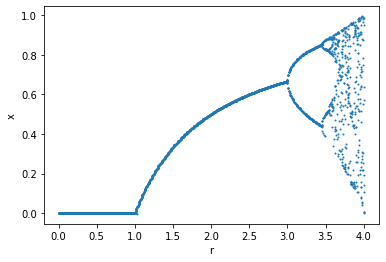

In [46]:
start_x = np.arange(0.5, 1, 0.05)
r = np.arange(0.01, 4.05, 0.01)

# doing some crazy numpy shit
x = np.fromfunction(lambda i, j: start_x[i] ,(start_x.shape[0], r.shape[0]), dtype=int)

x = np.multiply(x * (1 - x), np.transpose(r))

NUM_OF_ITERATIONS = 10 ** 3

for _ in range(NUM_OF_ITERATIONS):
    x = np.multiply(x * (1 - x), np.transpose(r))

r_axis = np.tile(r, start_x.shape[0])
    
plt.scatter(r_axis, x.flatten(), s=1)
plt.xlabel('r')
plt.ylabel('x')


/tmp/ipykernel_5112/2884575713.py:12: RuntimeWarning: overflow encountered in multiply
  x = np.multiply(x * (1 - x), np.transpose(r))


Text(0, 0.5, 'x')

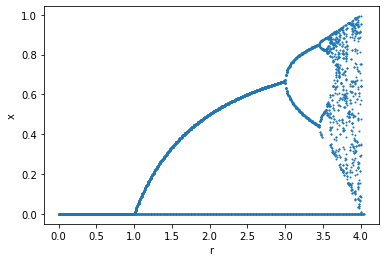

In [48]:
start_x = np.arange(0, 1, 0.05)
r = np.arange(0.01, 4.05, 0.01)

x = np.fromfunction(lambda i, j: start_x[i] ,(start_x.shape[0], r.shape[0]), dtype=int)


x = np.multiply(x * (1 - x), np.transpose(r))

NUM_OF_ITERATIONS = 10 ** 3

for _ in range(NUM_OF_ITERATIONS):
    x = np.multiply(x * (1 - x), np.transpose(r))

r_axis = np.tile(r, start_x.shape[0])
    
plt.scatter(r_axis, x.flatten(), s=1)
plt.xlabel('r')
plt.ylabel('x')

*Interpretacja:* Dla paramteru $r \in [0, 1]$ $x$ dąży do 0. Dla parametru $r \in [1,3]$ $x$ dąży do pewnej krzywej, będącej funkcją $r$. Dla większych $r$, $x$ zmierza do większej ilości punktów stabilnych, a potem zachowuje się chaotycznie i nie można już mówić o przewidywalnej zbieżności. Dla wszystkich wartości $r$, $x=0$ jest punktem stabilnym

b)  Dla tych samych wartości $x_0$ oraz $r$ 
($3.75 \leqslant r \leqslant 3.8$) porównaj trajektorie obliczone
z użyciem pojedynczej i podwójnej precyzji. Wyjaśnij otrzymane wyniki.

Text(0.5, 1.0, 'float64')

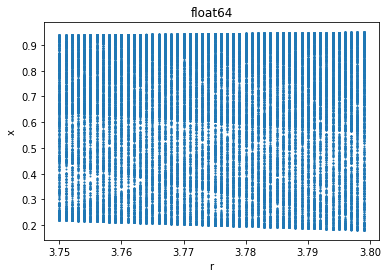

In [92]:
NUM_OF_ITERATIONS = 10 ** 5
STEP = 10**(-3)

start_x = np.arange(STEP, 1, STEP)
r = np.arange(3.75, 3.8, 0.001)

x = np.fromfunction(
    lambda i, j: start_x[i],
    (start_x.shape[0], r.shape[0]),
    dtype=int
                   ).astype(np.float64)


for _ in range(NUM_OF_ITERATIONS):
    x = np.multiply(x * (1 - x), np.transpose(r), dtype=np.float64)

r_axis = np.tile(r, start_x.shape[0])
    
plt.scatter(r_axis, x.flatten(), s=1)
plt.xlabel('r')
plt.ylabel('x')
plt.title('float64')


Text(0.5, 1.0, 'float32')

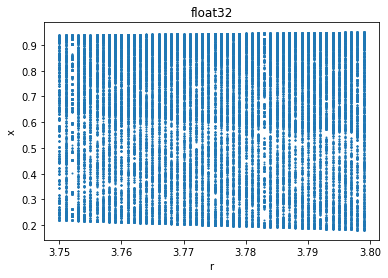

In [93]:
x = np.fromfunction(
    lambda i, j: start_x[i],
    (start_x.shape[0], r.shape[0]),
    dtype=int
                   ).astype(np.float32)


for _ in range(NUM_OF_ITERATIONS):
    x = np.multiply(x * (1 - x), np.transpose(r), dtype=np.float32)

r_axis = np.tile(r, start_x.shape[0])
    
plt.scatter(r_axis, x.flatten(), s=1)
plt.xlabel('r')
plt.ylabel('x')
plt.title('float32')

*Interpretacja:* dla float32, ze względu na braki w precyzji zbieżność do stablinych punktów zachodzi szybciej niż dla float64

c) Dla $r = 4$ i różnych wartości $x_0$ wyznacz (pojedyncza precyzja) liczbę iteracji
potrzebnych do osiągnięcia zera. Przedstaw interpretację rezultatów

In [107]:
start_x = np.arange(0.01, 1, 0.01)
r = np.array([4])

MAX_ITER = 10**6

for possible_start_x in start_x:
    x = np.float32(possible_start_x)
    iter_count = 0
    while iter_count < MAX_ITER and x != 0:

        x = np.float32(r * x * (1 - x))
        iter_count += 1
        
    if iter_count == MAX_ITER:
        print(f'It is not convergent for {possible_start_x}')
    else:
        print(f'For starting x: {possible_start_x}, number of iterations is: {iter_count}')


It is not convergent for 0.01
It is not convergent for 0.02
It is not convergent for 0.03
It is not convergent for 0.04
It is not convergent for 0.05
For starting x: 0.060000000000000005, number of iterations is: 1737
It is not convergent for 0.06999999999999999
It is not convergent for 0.08
It is not convergent for 0.09
It is not convergent for 0.09999999999999999
It is not convergent for 0.11
It is not convergent for 0.12
For starting x: 0.13, number of iterations is: 1733
It is not convergent for 0.14
It is not convergent for 0.15000000000000002
It is not convergent for 0.16
It is not convergent for 0.17
It is not convergent for 0.18000000000000002
It is not convergent for 0.19
It is not convergent for 0.2
It is not convergent for 0.21000000000000002
It is not convergent for 0.22
It is not convergent for 0.23
For starting x: 0.24000000000000002, number of iterations is: 277
It is not convergent for 0.25
It is not convergent for 0.26
It is not convergent for 0.27
It is not convergent

*Wnioski:* układ jest teoretycznie chaotyczny i nie powinien zbiegać do żadnej wartości, ale dla niektórych przypadkowych x jeśli wartość podczas któregoś kroku będzie dostatecznie bliska 0, przez błąd precyzji może zostać potraktowana jak 0 przez co układ osiągnie punkt stabilny 0.